# РК1 

# Кротков Александр Егорович
# Группа: ИУ5-22М
# Вариант 6

# Задача №6.
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.



# Задача №26.

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [18]:
data = pd.read_csv('/1-1-21 US covid19.csv')

In [19]:
data.head()

,State/Territory,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,State Region
0,Alaska,44966,NaN,NaN,1605,6147,202,NaN,NaN,6,27,West
1,Alabama,356820,287173.0,69647.0,22251,7277,4774,4174.0,600.0,187,97,South
2,Arkansas,222430,NaN,NaN,14489,7371,3637,NaN,NaN,261,120,South
3,American Samoa,3,NaN,NaN,0,5,0,NaN,NaN,0,0,Other
4,Arizona,512489,488303.0,24186.0,39216,7041,8718,7892.0,826.0,539,119,West


In [20]:

data = data.drop('Death Rate per 100000', 1)
data.head()

,State/Territory,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,State Region
0,Alaska,44966,NaN,NaN,1605,6147,202,NaN,NaN,6,West
1,Alabama,356820,287173.0,69647.0,22251,7277,4774,4174.0,600.0,187,South
2,Arkansas,222430,NaN,NaN,14489,7371,3637,NaN,NaN,261,South
3,American Samoa,3,NaN,NaN,0,5,0,NaN,NaN,0,Other
4,Arizona,512489,488303.0,24186.0,39216,7041,8718,7892.0,826.0,539,West


# Задача №6.

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.


In [21]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('State/Territory', ('object', 0)),
 ('Total Cases', ('int64', 0)),
 ('Confirmed Cases', ('float64', 27)),
 ('Probable Cases', ('float64', 27)),
 ('Cases in Last 7 Days', ('int64', 0)),
 ('Case Rate per 100000', ('int64', 0)),
 ('Total Deaths', ('int64', 0)),
 ('Confirmed Deaths', ('float64', 27)),
 ('Probable Deaths', ('float64', 27)),
 ('Deaths in Last 7 Days', ('int64', 0)),
 ('State Region', ('object', 0))]

In [23]:

# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data.columns]

[('State/Territory', 0.0),
 ('Total Cases', 0.0),
 ('Confirmed Cases', 0.45),
 ('Probable Cases', 0.45),
 ('Cases in Last 7 Days', 0.0),
 ('Case Rate per 100000', 0.0),
 ('Total Deaths', 0.0),
 ('Confirmed Deaths', 0.45),
 ('Probable Deaths', 0.45),
 ('Deaths in Last 7 Days', 0.0),
 ('State Region', 0.0)]


Видно, что пропуски имеются в полях Confirmed Cases и Probable Cases

In [24]:
# Заполним пропуски Confirmed Cases средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Confirmed Cases', data['Confirmed Cases'].mean())

In [25]:
# Заполним пропуски Probable Cases  средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Probable Cases', data['Probable Cases'].mean())

In [26]:
# Убедимся что нет пустых значений
data.isnull().sum()

State/Territory           0
Total Cases               0
Confirmed Cases           0
Probable Cases            0
Cases in Last 7 Days      0
Case Rate per 100000      0
Total Deaths              0
Confirmed Deaths         27
Probable Deaths          27
Deaths in Last 7 Days     0
State Region              0
dtype: int64

# Задача №26.

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.


In [27]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

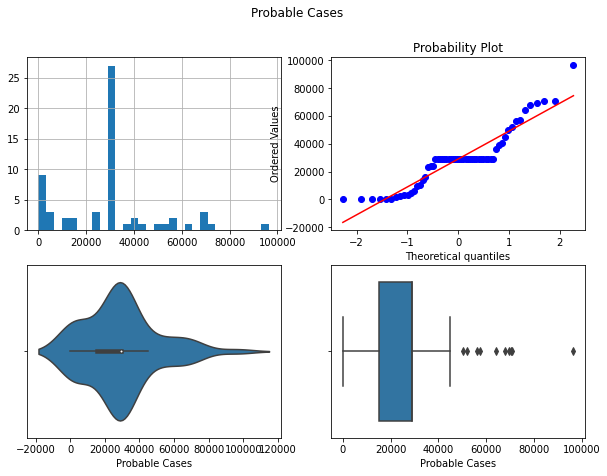

In [28]:
diagnostic_plots(data, 'Probable Cases', 'Probable Cases')

In [29]:

lower_boundary = data['Probable Cases'].mean() - (3 * data['Probable Cases'].std())
upper_boundary = data['Probable Cases'].mean() + (3 * data['Probable Cases'].std())
print('Нижняя граница',lower_boundary)
print('Верхняя граница', upper_boundary)

Нижняя граница -33436.62360082393
Верхняя граница 91583.47208567243


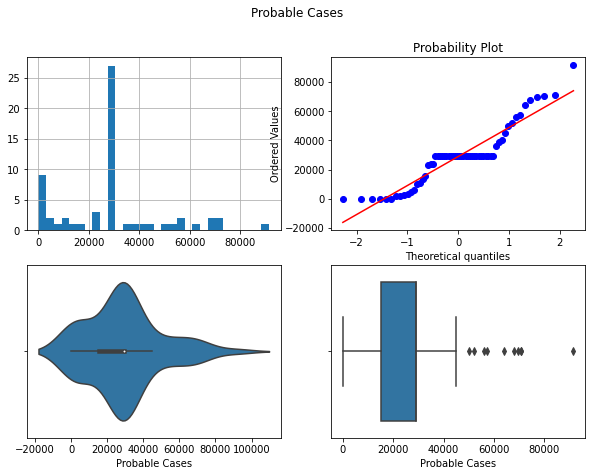

In [35]:

col = 'Probable Cases'
data[col] = np.where(data[col] > upper_boundary, upper_boundary,np.where(data[col] < lower_boundary, lower_boundary, data[col]))
diagnostic_plots(data, col, title='Probable Cases')